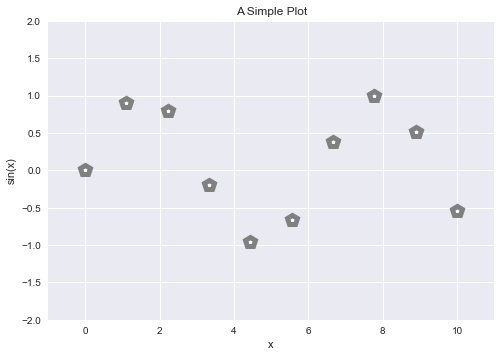

In [1]:
"""

    SCATTER PLOT CON .plot():
    
    En matplotlib I.ipynb se ha usado .plot() para dibujar las líneas.
    En ella se puede configurar el estilo de la marca o punto, el 
    estilo de la línea y el color respectivamente.
    Pero si necesitamos una nube de puntos tan solo se ha de obviar 
    el estilo de la línea e indicar el estilo del punto.
    
    Poco a poco se introducen nuevas características sin 
    comentarlas en profundidad.
"""

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


plt.style.use('seaborn')           # Estilo distinto, print(plt.style.available)
x = np.linspace(0, 10, 10)

# fig = plt.figure(figsize=(7, 7))   # Se puede crear figure y crear ax o solo crear ax
# ax = fig.add_subplot(1,1,1)
ax = plt.axes()

ax.plot(x, 
        np.sin(x), 
        # El argumento del medio, estilo de línea no debe aparecer
        'Dg',                      
        
        # ESTAS NO:
        # linewidth=2, 
        # linestyle='--',
        # color='r'                # color hace refencia al color de la línea
        
        # En lugar del modo abreviado también se puede explicito:
         marker='p',               # Poniendo solo esta propiedad no funcionaría, se necesitan las de abajo
         markersize=10,            
         markerfacecolor='white',  
         markeredgecolor='gray',   
         markeredgewidth=5,        
       )
ax.set(xlim=(-1, 11), 
       ylim=(-2, 2),
       xlabel='x', 
       ylabel='sin(x)',
       title='A Simple Plot')
plt.show()

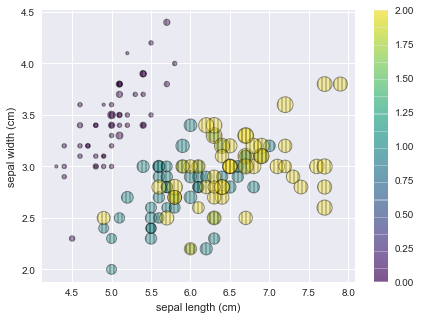

In [7]:
"""

    SCATTER PLOT CON .scatter():
    + LEYENDA COLOR BAR:
    
    Mejor que usar el genérico .plot() que tiene menos opciones de configuración.
    scatter permite controlar cada punto de forma individual o, má común, por grupos.
    
    PERO para datos con gran cantidad de muestras es preferible usar .plot() porque
    .scatter gasta recursos en iterar sobre cada punto para aplicar 
    cada atributo distinto.

"""

from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T                 # Matriz traspuesta para que las columnas sean las filas (features[N])

# Se puede crear figure y crear ax o solo crear ax, resulta un AxesSubplot
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1)
# ax = plt.axes()

im = ax.scatter(features[0],                # sepal length
            features[1],               # sepal width
            alpha=0.4,                 # Para poder verlos amontonados
            s=100*features[3],         # petal width RADIO
            c=iris.target,             # clase de flor COLOR
            cmap='viridis',
            
            edgecolor='black', 
            linewidth=1,
            facecolor='black', 
            hatch='|||'                # patrón de relleno
           )
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])

fig.colorbar(im, ax=ax)  ## COLORBAR

plt.show()


########################Matlab Interfaz#################################
# plt.scatter(features[0],               # sepal length
#             features[1],               # sepal width
#             alpha=0.4,                 # Para poder verlos amontonados
#             s=100*features[3],         # petal width
#             c=iris.target,             # clase de flor
#             cmap='viridis',
#            
#             edgecolor='black', 
#             linewidth=1,
#             facecolor='black', 
#             hatch='|||'                # patrón de relleno
#            )
# plt.xlabel(iris.feature_names[0])
# plt.ylabel(iris.feature_names[1])
# plt.colorbar(label='clase fe la flor') 
# plt.show()
########################################################################

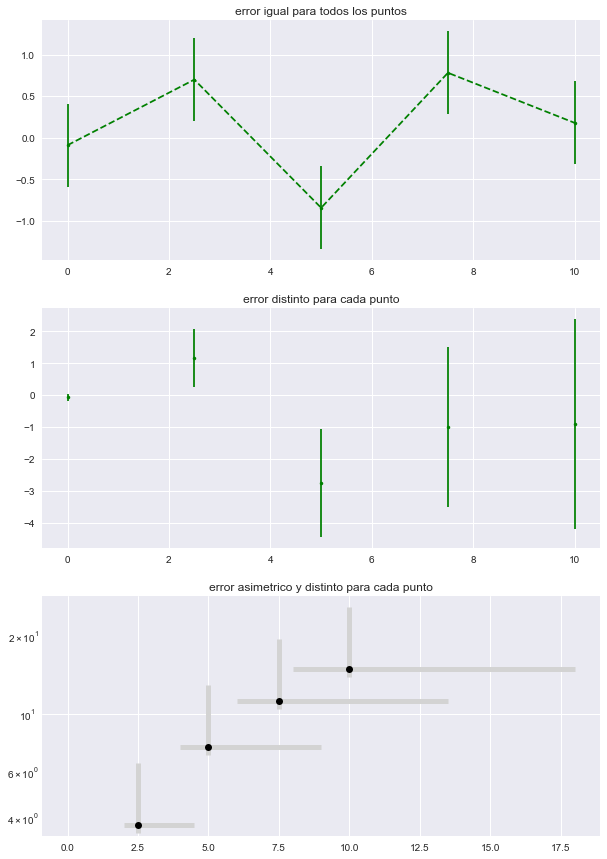

In [17]:
"""
    ERRORES ±: errorbar()
    
    # BTW:
    # En linspace el último número está incluido []
    # En arange el último número no lo está [)

    Error contínuo
    Error simétrico pero variable
    Error asimetrico (incluso en ejeX y ejeY a la vez)
    
    Obviamente error distinto por cada punto de forma independiente
    
    Además se muestra como poner las escalas de los ejes en log
"""

points = 5
x = np.linspace(0, 10, points)

# En lugar de emplar múltiples líneas para:
# fig = plt.figure(figsize=(20, 10))
# ax1 = fig.add_subplot(2,2,1)
# También se puede:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, 
                                    ncols=1, 
                                    figsize=(10, 15),
                                    sharex=False)  # sharex: propiedades compartidas entre ax_N PRUEBALO

dy_err_noise = 0.5  # Puede ser un tensor0 escalar
y = np.sin(x) + dy_err_noise * np.random.randn(points)
ax0.errorbar(x, y, yerr=dy_err_noise, fmt='.--g') 
ax0.set_title('error igual para todos los puntos')

dy_err_noise = np.arange(0.1, 4, 4/points)  # o un tensor1 vector
y = np.sin(x) + dy_err_noise * np.random.randn(points)
ax1.errorbar(x, y, yerr=dy_err_noise, fmt='.g')  # yerr o xerr
ax1.set_title('error distinto para cada punto')

dy_err_noise = [x*0.1, x*1.1] # o tensor2 matriz
dx_err_noise = [x*0.2, x*0.8] 
y = np.sin(x) + dy_err_noise * np.random.randn(points)
ax2.errorbar(x, x*1.5, 
             xerr=dx_err_noise, 
             yerr=dy_err_noise, 
             fmt='ko',
             color='black',
             ecolor='lightgray', 
             elinewidth=5, 
             capsize=0,   # The length of the error bar caps in points
             capthick=50,   #  markeredgewidth
             barsabove=False  # Si True las barrar de error por encima del punto
             # errorevery=(6,2)  # Solo barras de error en 6, 8, 10, 12...
            )  
ax2.set_title('error asimetrico y distinto para cada punto')

ax2.set_yscale('log')

plt.show()

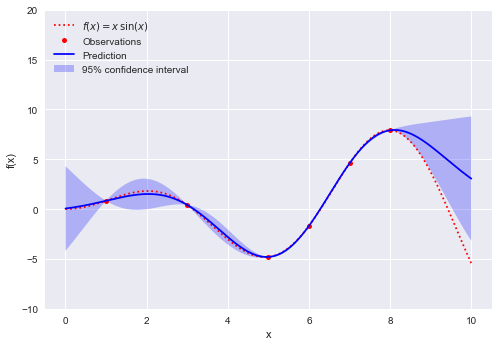

In [39]:
"""
    
    ERRORES CONTÍNUOS:
    
    Matplotlib no tiene esta gráfica integrada y se implementa 
    como plt.fill_between o plt.fill entre dos líneas de plt.plot
    https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html#Continuous-Errors
"""

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(43)

def f(x):
    """La función a predecir"""
    return x * np.sin(x)

# Datos
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T # Vector columna, de ahí atleast_2d
y = f(X).ravel()
x = np.atleast_2d(np.linspace(0, 10, 1000)).T # Muchas muestras en medio de los puntos

# Modelo de reg gaussiano
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(X, y)
y_pred, sigma = gp.predict(x, return_std=True)

# Gráfica con 95% interv. conf. basado en MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$') # line plot RED
plt.plot(X, y, 'r.', markersize=10, label='Observations') # scatter plot
plt.plot(x, y_pred, 'b-', label='Prediction') # line plot BLUE
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,  # 2*sigma ~ 95% región conf.
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.25, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

In [14]:
# from sklearn.datasets import california_housing
# import pandas as pd

# pd.Dataframe(california_housing)

AttributeError: module 'pandas' has no attribute 'Dataframe'